# Session 1 : Introduction to Signal Processing

>Intelligence Artificielle & Machine Learning pour la modélisation de séries temporelles et de signaux<br />
>Master 1 Parcours IA ENS Paris Saclay<br />
>Laurent Oudre (laurent.oudre@ens-paris-saclay.fr)

This first session is dedicated to the description of basic notions in signal processing such as sampling, Discrete Fourier Transform (DFT) and digital filters. Slides are available at http://www.laurentoudre.fr/signalml.html

1. **Library and data loading**
2. **Exploratory study**
3. **Study in the frequency domain**
4. **Filtering a signal**

## 1. Library and data loading

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [8]:
plt.rcParams['figure.figsize'] = (10,5)

In [9]:
# Data loading
npzfile = np.load('Session1.npz')
x=npzfile['x']
Fs=npzfile['Fs']

# First investigations
N=np.size(x)
print("Sampling Frequency : {Fs} Hz".format(**locals()))
print("Number of samples : {N}".format(**locals()))

Sampling Frequency : 100 Hz
Number of samples : 1000


## 2. Exploratory study

A signal $x[n]$ with sampling frequency $F_s$ can be plotted either as a function of the sample $n$ or as a function of the timestamp $t[n]$ defined as $$t[n] = \frac{n}{F_s} \ \ \ n=0\ldots N-1$$

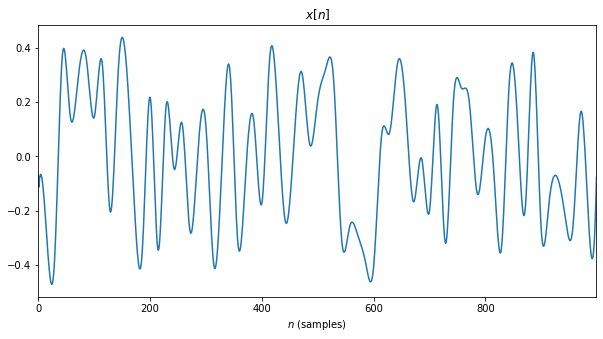

In [10]:
# x[n] as a function of the sample n
n=np.arange(N)
plt.plot(n,x)
plt.xlim((0,N-1))
plt.xlabel('$n$ (samples)')
plt.title('$x[n]$')
plt.show()

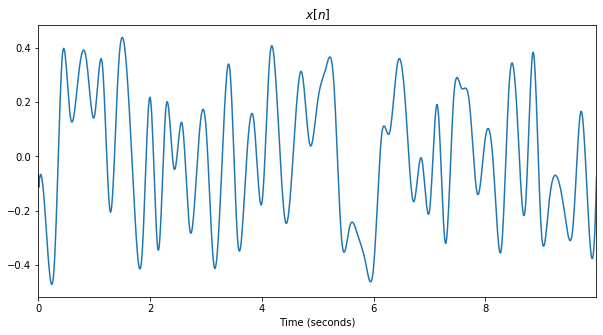

In [11]:
# x[n] as a function of the time t[n]
t=np.arange(N)/Fs
plt.plot(t,x)
plt.xlim((0,(N-1)/Fs))
plt.xlabel('Time (seconds)')
plt.title('$x[n]$')
plt.show()

## 3. Study in the frequency domain

The signal $x[n]$ can be studied in the frequency domain by computing its Discrete Fourier Transform (DFT) defined as
$$X[k] = \displaystyle\sum_{n=0}^{N-1} x[n] e^{-j 2\pi \frac{k n}{N}}\ \ \ k=0,\ldots,N-1$$ One efficient algorithm to compute it is the Fast Fourier Transform (FFT). Since it is a complex quantity, it is convenient to display its squared absolute value, possibly renormalized.

In [12]:
# Function to compute the centered Fast Fourier Transform (FFT)
def my_fft(x,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    X=np.fft.fftshift(X)
    # Computation the frequency vector
    f=np.fft.fftfreq(N, d=1/Fs)
    f=np.fft.fftshift(f)
    return X,f

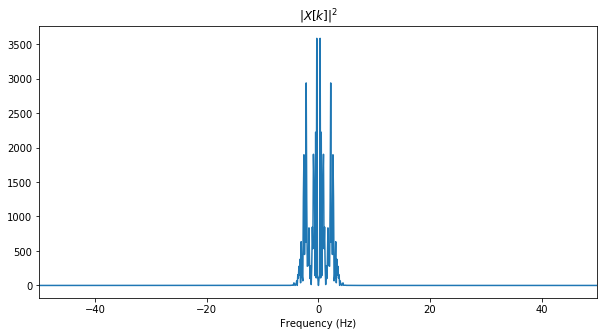

In [13]:
# Display of the squared absolute value of the DFT as a function of frequency
X,f=my_fft(x,Fs)
plt.plot(f,np.abs(X)**2)
plt.xlim((-Fs/2,Fs/2))
plt.xlabel('Frequency (Hz)')
plt.title('$|X[k]|^2$')
plt.show()

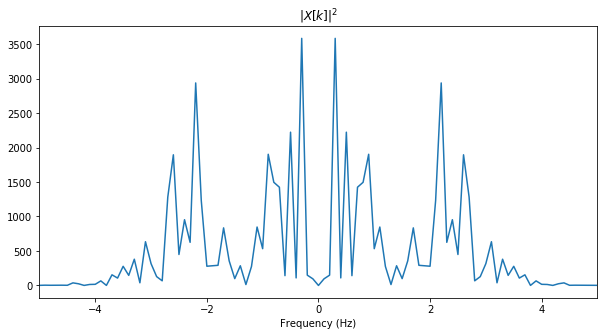

In [14]:
# We can zoom on the signal bandwidth : here between -5Hz and +5Hz
X,f=my_fft(x,Fs)
plt.plot(f,np.abs(X)**2)
plt.xlim((-5,5))
plt.xlabel('Frequency (Hz)')
plt.title('$|X[k]|^2$')
plt.show()

## 4. Filtering a signal

In order to extract a phenomenon of interest from a signal (or to remove a spurious one), it is possible to apply a digital filter that will amplify/diminish some frequencies in the signal spectrum and transform the original signal $x[n]$ into a filtered signal $y[n]$. Four main types are mainly used : 
* low-pass filters (remove high frequencies)
* high-pass filters (remove low frequencies)
* band-pass filters (remove all frequencies that do not belong to a specified frequency band)
* band-stop filters (remove all frequencies that  belong to a specified frequency band).

The filters are characterized by their cut frequencies (one for low- and high-pass filters and two for band-pass and band-stop filters)

### 4.1 Low-pass filter

In [15]:
def low_pass_filter(x,fc,Fs):
    wc=fc/(Fs/2)
    b, a = signal.butter(4, wc, 'low')
    y = signal.filtfilt(b, a, x)
    return y    

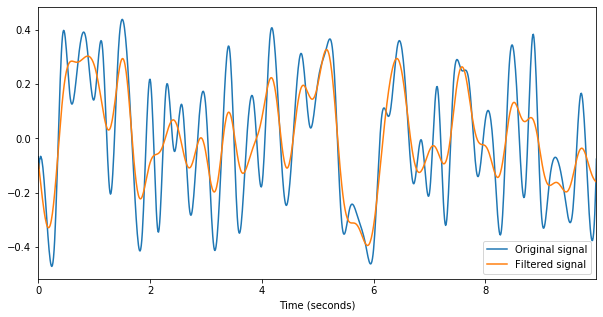

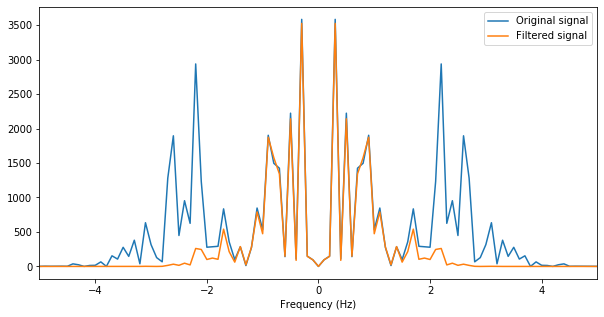

In [16]:
# Low-pass filter with cut frequency fc = 2Hz
fc=2
y=low_pass_filter(x,fc,Fs)

# Plot in the time domain
plt.plot(t,x)
plt.plot(t,y)
plt.xlim((0,(N-1)/Fs))
plt.xlabel('Time (seconds)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()

# Plot in the frequency domain
X,f=my_fft(x,Fs)
Y,f=my_fft(y,Fs)
plt.plot(f,np.abs(X)**2)
plt.plot(f,np.abs(Y)**2)
plt.xlim((-5,5))
plt.xlabel('Frequency (Hz)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()

### 4.2 High-pass filter

In [17]:
def high_pass_filter(x,fc,Fs):
    wc=fc/(Fs/2)
    b, a = signal.butter(4, wc, 'high')
    y = signal.filtfilt(b, a, x)
    return y  

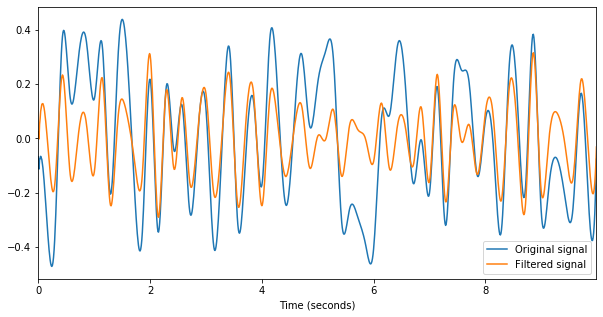

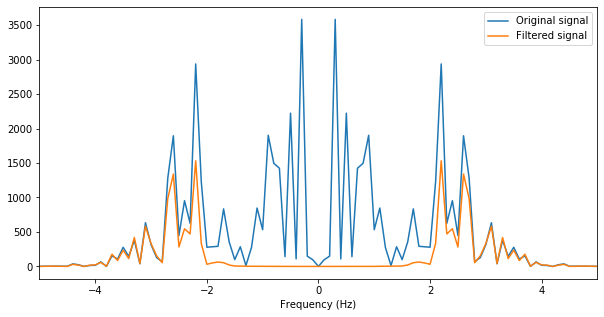

In [18]:
# High-pass filter with cut frequency fc = 2Hz
fc=2
y=high_pass_filter(x,fc,Fs)

# Plot in the time domain
plt.plot(t,x)
plt.plot(t,y)
plt.xlim((0,(N-1)/Fs))
plt.xlabel('Time (seconds)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()

# Plot in the frequency domain
X,f=my_fft(x,Fs)
Y,f=my_fft(y,Fs)
plt.plot(f,np.abs(X)**2)
plt.plot(f,np.abs(Y)**2)
plt.xlim((-5,5))
plt.xlabel('Frequency (Hz)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()

### 4.3 Band-pass filter

In [19]:
def band_pass_filter(x,fc,Fs):
    wc=fc/(Fs/2)
    b, a = signal.butter(4, wc, 'bandpass')
    y = signal.filtfilt(b, a, x)
    return y  

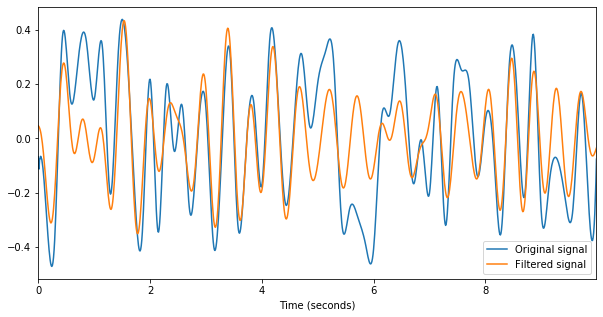

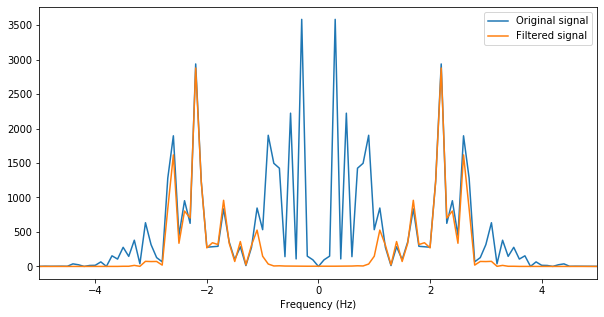

In [20]:
# Band-pass filter with cut frequencies fc1 = 1Hz and fc2 = 3Hz
fc=(1,3)
y=band_pass_filter(x,fc,Fs)

# Plot in the time domain
plt.plot(t,x)
plt.plot(t,y)
plt.xlim((0,(N-1)/Fs))
plt.xlabel('Time (seconds)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()

# Plot in the frequency domain
X,f=my_fft(x,Fs)
Y,f=my_fft(y,Fs)
plt.plot(f,np.abs(X)**2)
plt.plot(f,np.abs(Y)**2)
plt.xlim((-5,5))
plt.xlabel('Frequency (Hz)')
plt.legend(('Original signal', 'Filtered signal'))
plt.show()